##  load_modelがおかしいのを検証する

In [1]:
import logging as lg
from pathlib import Path
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
verbose=True
BATCH_SIZE=100
VALID_RATE=0.3

RESULT_DIR=Path(f"result/test_loaded_{BATCH_SIZE}_{VALID_RATE}")
if verbose:
    lg.getLogger().setLevel(lg.INFO)
    lg.info("Verbose mode activated")

INFO:root:Verbose mode activated


In [3]:
from tools.models import MLPClassifier

In [4]:
def reshape_mnist_mlp(x,y):
    sample_num=x.shape[0]
    x=x.reshape(sample_num, -1)
    x= x.astype('float32')
    x /= 255
    y = to_categorical(y, 10)
    return x,y

In [5]:
from sklearn.model_selection import train_test_split
(x_train_val, y_train_val), (x_test, y_test) = mnist.load_data()

x_train_val_mlp,y_train_val_mlp=reshape_mnist_mlp(x_train_val,y_train_val)
X_test_mlp,y_test_mlp=reshape_mnist_mlp(x_test,y_test)


X_train_mlp, X_valid_mlp, y_train_mlp, y_valid_mlp = train_test_split(x_train_val_mlp, y_train_val_mlp, test_size=VALID_RATE)


In [6]:
model=MLPClassifier(input_dim=784,output_dim=10,result_dir=RESULT_DIR)

INFO:root:Not found such a trained model.
INFO:root:Creating new model...
INFO:root:Finished.


In [8]:
history=model.fit(X_train=X_train_mlp,y_train=y_train_mlp,epochs=10,batch_size=BATCH_SIZE,X_valid=X_valid_mlp,y_valid=y_valid_mlp)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 53us/step - loss: 0.2895 - acc: 0.9136 - val_loss: 0.1416 - val_acc: 0.9564
Epoch 2/10
42000/42000 [==============================] - 2s 36us/step - loss: 0.1175 - acc: 0.9645 - val_loss: 0.1000 - val_acc: 0.9696
Epoch 3/10
42000/42000 [==============================] - 2s 36us/step - loss: 0.0760 - acc: 0.9770 - val_loss: 0.0862 - val_acc: 0.9734
Epoch 4/10
42000/42000 [==============================] - 2s 36us/step - loss: 0.0563 - acc: 0.9829 - val_loss: 0.0866 - val_acc: 0.9738
Epoch 5/10
42000/42000 [==============================] - 2s 36us/step - loss: 0.0422 - acc: 0.9867 - val_loss: 0.0810 - val_acc: 0.9756
Epoch 6/10
42000/42000 [==============================] - 2s 36us/step - loss: 0.0323 - acc: 0.9892 - val_loss: 0.0817 - val_acc: 0.9768
Epoch 7/10
42000/42000 [==============================] - 2s 36us/step - loss: 0.0247 - acc: 0.9920 - val_loss: 0.0873 - val_acc

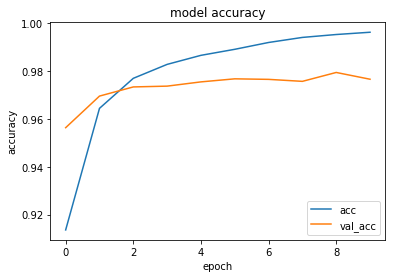

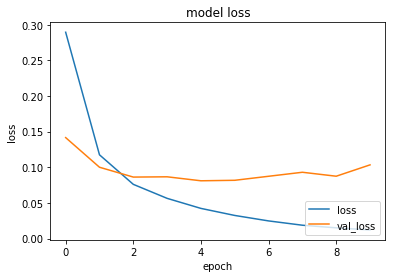

In [9]:
model.plot_history(epoch=10)

In [11]:
loaded_model=MLPClassifier(input_dim=784,output_dim=10,result_dir=RESULT_DIR,trained_epochs=10)

INFO:root:Loading the trained model...
INFO:root:Loaded.


In [12]:
model.evaluate(X_test_mlp,y_test_mlp),loaded_model.evaluate(X_test_mlp,y_test_mlp)

10000/10000 [==============================] - 0s 40us/step


({'loss': 0.09910182151495574, 'acc': 0.9795},
 {'loss': 0.09910182151495574, 'acc': 0.9795})

In [13]:
model.evaluate(X_train_mlp,y_train_mlp),loaded_model.evaluate(X_train_mlp,y_train_mlp)

42000/42000 [==============================] - 2s 36us/step


({'loss': 0.007196993072281787, 'acc': 0.9978571428571429},
 {'loss': 0.007196993072281787, 'acc': 0.9978571428571429})

In [14]:
model.evaluate(X_valid_mlp,y_valid_mlp),loaded_model.evaluate(X_valid_mlp,y_valid_mlp)

18000/18000 [==============================] - 1s 36us/step


({'loss': 0.10333927625371467, 'acc': 0.9766666666666667},
 {'loss': 0.10333927625371467, 'acc': 0.9766666666666667})